In [1]:
#import libraries
import pandas as pd
import numpy as np


In [2]:
#read the required dataset
df = pd.read_csv('C:/Users/stanl/Downloads/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
# we convert the data feature to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
# don't forget to set date column as index
df.set_index('DATE', inplace=True)

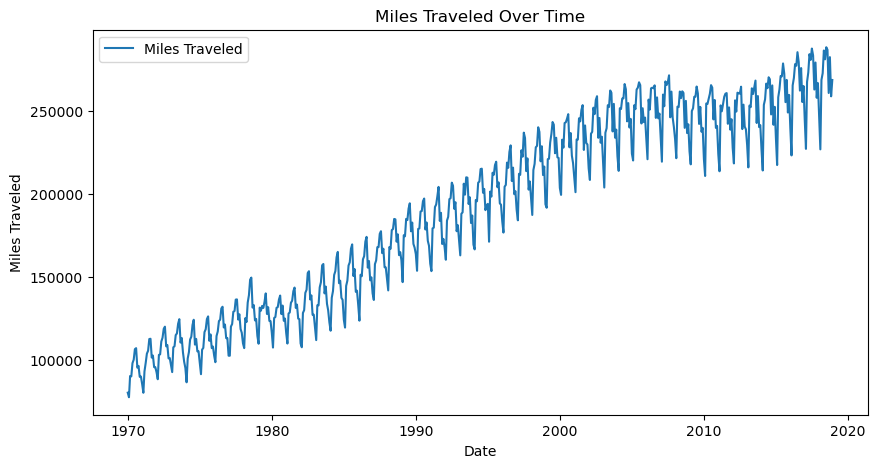

In [5]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['TRFVOLUSM227NFWA'], label='Miles Traveled')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.title('Miles Traveled Over Time')
plt.legend()
plt.show()


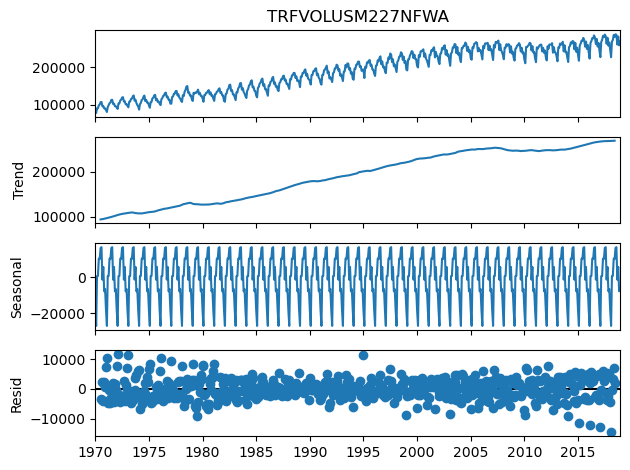

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['TRFVOLUSM227NFWA'], model='additive')
decomposition.plot()
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['TRFVOLUSM227NFWA'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.2425483519561484
p-value: 0.6550300653192418


In [8]:
df_diff = df['TRFVOLUSM227NFWA'].diff().dropna()

# Re-check stationarity after differencing
result = adfuller(df_diff)
print('ADF Statistic after differencing:', result[0])
print('p-value after differencing:', result[1])


ADF Statistic after differencing: -4.893095824173375
p-value after differencing: 3.596973786910336e-05


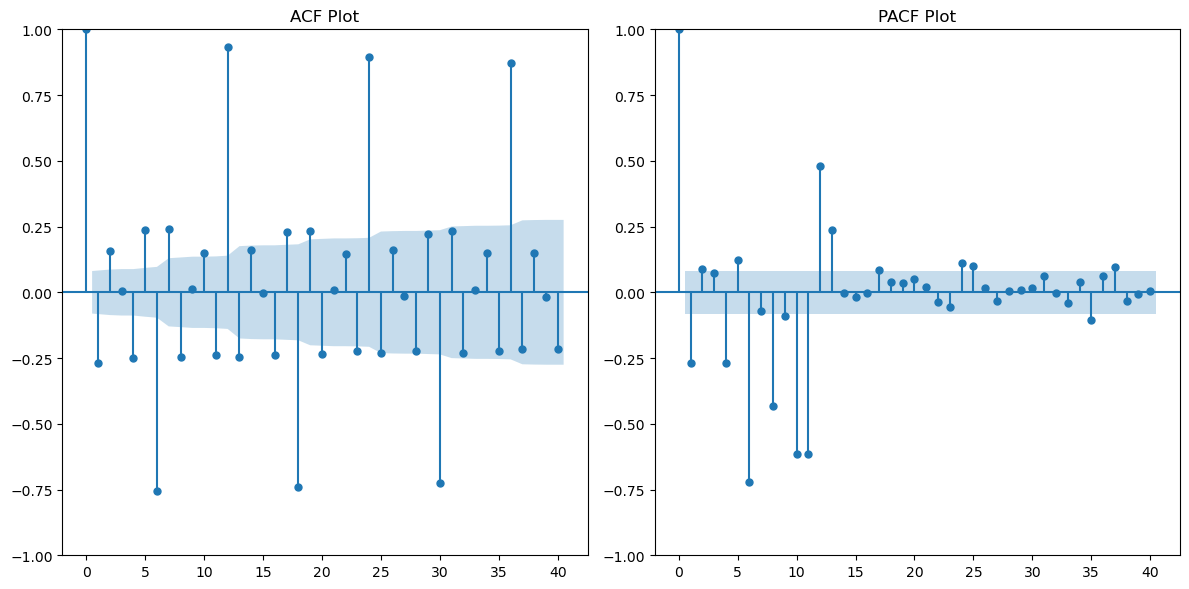

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced data
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(df['TRFVOLUSM227NFWA'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=10)  # Forecasting the next 10 points
print(forecast)


C:\Users\stanl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\stanl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\stanl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       TRFVOLUSM227NFWA   No. Observations:                  588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6356.857
Date:                Tue, 30 Jul 2024   AIC                          12719.714
Time:                        11:37:15   BIC                          12732.840
Sample:                    01-01-1970   HQIC                         12724.829
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4159      0.126     -3.314      0.001      -0.662      -0.170
ma.L1          0.1709      0.123      1.387      0.166      -0.071       0.412
sigma2      1.495e+08   2.55e-09   5.86e+16      0.0

In [11]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(df['TRFVOLUSM227NFWA'], model_fit.fittedvalues)
print('MSE:', mse)


MSE: 159896438.3849042


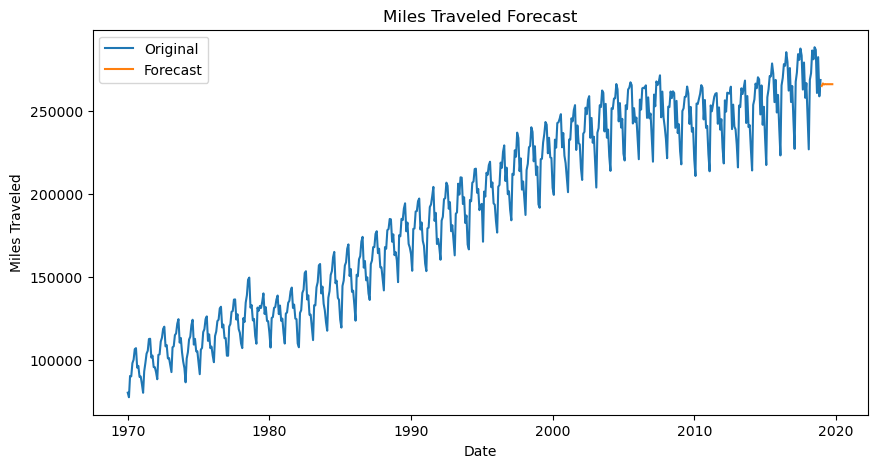

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['TRFVOLUSM227NFWA'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Miles Traveled')
plt.title('Miles Traveled Forecast')
plt.legend()
plt.show()
